To create a data science pipeline for predicting future sales based on the provided data, we will follow these steps:

Load Data: Read the CSV file into a DataFrame.

Prepare Data: Clean the data, handle missing values, and perform necessary transformations.

Exploratory Data Analysis (EDA): Visualize and summarize the data to understand its characteristics.

Train Model: Train a time series forecasting model.

Forecast: Use the trained model to predict future sales.

Let's start by examining the data file.

In [113]:

# EDA Libraries:

import pandas as pd
import numpy as np

import matplotlib.colors as col
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime
from pathlib import Path  
import random

# Scikit-Learn models:

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split



# ARIMA Model:

import statsmodels.tsa.api as smt
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse


import pickle
import warnings


In [114]:
warnings.filterwarnings("ignore", category=FutureWarning)

In [115]:
import os

# List files in the directory
files = os.listdir('Documents/Machine Learning')
print(files)


['.DS_Store', 'Time Series.ipynb', 'Data Sets', 'Portfolio Construction and Analysis-edhec business school coursera', 'Time Series', 'Data Collection- Web scrapping', 'sensor.csv', 'Time Series Exploratory Data Analysis- Tesla Stock.ipynb', '.ipynb_checkpoints', 'Deep Learning', 'sales_data_practical_assignment.csv', 'Cleaning Time series data- Beer Production in Australia.ipynb']


In [116]:
# Read the file content
file_path = 'Documents/Machine Learning/sales_data_practical_assignment.csv'

with open(file_path, 'r') as file:
    content = file.readlines()

# Display the first few lines
print(content[:10])

[',orderDate,WGR1,WGR2,WGR3,WGR4,articleNumber,quantity,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco,promotion_article,promotion_wgr,promotion_global,public_holiday,school_holiday,sunday\n', "0,2021-03-01,0.0,42,4200,4210,1010,0.0,4.2,0.2,'75.1',0.0,0.0,333.9,8.1,30.2,1035.0,590.0,2,no,no,no,no,no,no\n", "1,2021-03-01,0.0,85,8700,8708,0546,86.106186954104,4.2,0.2,'75.1',0.0,0.0,333.9,8.1,30.2,1035.0,590.0,2,no,no,no,no,no,no\n", "2,2021-03-01,0.0,85,8700,8702,90412196,54.690260418206066,4.2,0.2,'75.1',0.0,0.0,333.9,8.1,30.2,1035.0,590.0,2,no,no,no,no,no,no\n", "3,2021-03-01,0.0,85,8700,8702,90412080,64.11503837897544,4.2,0.2,'75.1',0.0,0.0,333.9,8.1,30.2,1035.0,590.0,2,no,no,no,no,no,no\n", "4,2021-03-01,0.0,85,8700,8702,90412011,26.41592653589793,4.2,0.2,'75.1',0.0,0.0,333.9,8.1,30.2,1035.0,590.0,2,no,no,no,no,no,no\n", "5,2021-03-01,0.0,85,8660,8665,5001,0.0,4.2,0.2,'75.1',0.0,0.0,333.9,8.1,30.2,1035.0,590.0,2,no,no,no,no,no,no\n", "6,2021-03-01,0.0,68,6800,6802,65110,38.98

#### Step 1: Load Data
We'll load the data from the CSV file.

In [117]:
# Load the data

data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()

,Unnamed: 0,orderDate,WGR1,WGR2,WGR3,WGR4,articleNumber,quantity,temp,dwpt,...,wpgt,pres,tsun,coco,promotion_article,promotion_wgr,promotion_global,public_holiday,school_holiday,sunday
0,0,2021-03-01,0.0,42,4200,4210,1010,0.000000,4.2,0.2,...,30.2,1035.0,590.0,2,no,no,no,no,no,no
1,1,2021-03-01,0.0,85,8700,8708,546,86.106187,4.2,0.2,...,30.2,1035.0,590.0,2,no,no,no,no,no,no
2,2,2021-03-01,0.0,85,8700,8702,90412196,54.690260,4.2,0.2,...,30.2,1035.0,590.0,2,no,no,no,no,no,no
3,3,2021-03-01,0.0,85,8700,8702,90412080,64.115038,4.2,0.2,...,30.2,1035.0,590.0,2,no,no,no,no,no,no
4,4,2021-03-01,0.0,85,8700,8702,90412011,26.415927,4.2,0.2,...,30.2,1035.0,590.0,2,no,no,no,no,no,no


#### Step 2: Prepare Data
    
This step includes handling missing values, parsing dates, and ensuring the data is in the correct format for analysis.

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9432 entries, 0 to 9431
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         9432 non-null   int64  
 1   orderDate          9432 non-null   object 
 2   WGR1               9432 non-null   float64
 3   WGR2               9432 non-null   int64  
 4   WGR3               9432 non-null   int64  
 5   WGR4               9432 non-null   int64  
 6   articleNumber      9432 non-null   int64  
 7   quantity           9432 non-null   float64
 8   temp               9422 non-null   float64
 9   dwpt               9432 non-null   float64
 10  rhum               9432 non-null   object 
 11  prcp               9432 non-null   float64
 12  snow               9432 non-null   float64
 13  wdir               9432 non-null   float64
 14  wspd               9432 non-null   float64
 15  wpgt               9432 non-null   float64
 16  pres               9432 

In [119]:
#statistical analysis of the dataset:Mean, Standard Deviation
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,9432.0,4.715500e+03,2.722928e+03,0.0,2357.75,4715.500000,7073.250000,9.431000e+03
WGR1,9432.0,0.000000e+00,0.000000e+00,0.0,0.00,0.000000,0.000000,0.000000e+00
WGR2,9432.0,5.454167e+01,1.715215e+01,42.0,42.00,45.000000,68.000000,8.500000e+01
WGR3,9432.0,5.519167e+03,1.774763e+03,4200.0,4275.00,4500.000000,6800.000000,8.700000e+03
WGR4,9432.0,5.524958e+03,1.773168e+03,4210.0,4281.00,4504.000000,6802.000000,8.708000e+03
articleNumber,9432.0,1.145394e+07,2.984512e+07,527.0,152345.50,243003.000000,247655.000000,9.041220e+07
quantity,9432.0,9.213614e+01,2.757516e+02,0.0,0.00,29.557519,64.115038,3.758628e+03
temp,9422.0,1.150754e+01,7.534373e+00,-2.8,5.50,10.200000,17.700000,2.740000e+01
dwpt,9432.0,4.744529e+00,7.001685e+00,-13.3,-0.80,4.000000,10.600000,1.870000e+01
prcp,9432.0,1.404835e+00,5.745461e+00,0.0,0.00,0.000000,0.500000,9.670000e+01


### Data Preprocessing

In [122]:
# Drop weather-related columns 
columns_to_drop = ['dwpt', 'rhum', 'prcp', 'wdir', 'wspd', 'wpgt', 'pres', 'tsun', 'coco','Unnamed: 0']
data.drop(columns=columns_to_drop, inplace=True)

In [123]:
#check percentage of missing values for each column
(data.isnull().sum().sort_values(ascending=False)/len(data))*100

temp                 0.106022
promotion_article    0.106022
orderDate            0.000000
WGR1                 0.000000
WGR2                 0.000000
WGR3                 0.000000
WGR4                 0.000000
articleNumber        0.000000
quantity             0.000000
snow                 0.000000
promotion_wgr        0.000000
promotion_global     0.000000
public_holiday       0.000000
school_holiday       0.000000
sunday               0.000000
dtype: float64

In [124]:
# Forward fill the 'promotion_article' column
data['promotion_article'] = data['promotion_article'].ffill()
data['temp'] = data['temp'].ffill()



In [125]:
# Verify the imputation
missing_values_promotion_article = data['promotion_article'].isnull().sum()
print(f"Number of missing values in 'promotion_article' after forward fill: {missing_values_promotion_article}")

missing_values_temp = data['temp'].isnull().sum()
print(f"Number of missing values in 'temp' after forward fill: {missing_values_temp}")

Number of missing values in 'promotion_article' after forward fill: 0
Number of missing values in 'temp' after forward fill: 0


In [126]:
#Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 orderDate            0
WGR1                 0
WGR2                 0
WGR3                 0
WGR4                 0
articleNumber        0
quantity             0
temp                 0
snow                 0
promotion_article    0
promotion_wgr        0
promotion_global     0
public_holiday       0
school_holiday       0
sunday               0
dtype: int64


In [127]:
# Check for duplicate rows
duplicate_rows = data.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

Number of duplicate rows: 0


In [128]:
# Remove duplicate rows
data_no_duplicates = data.drop_duplicates()

In [129]:
# Verify the removal of duplicate rows
print(f"Number of rows after removing duplicates: {data_no_duplicates.shape[0]}")

Number of rows after removing duplicates: 9432


In [130]:
# Check again for duplicates to confirm they are removed
duplicate_rows_after = data_no_duplicates.duplicated()
print(f"Number of duplicate rows after removal: {duplicate_rows_after.sum()}")

Number of duplicate rows after removal: 0


#### Handling DateTime column

#### We can create a function to identify rows with malformed dates.

In [131]:
# Function to check for valid dates
def is_valid_date(date_str):
    try:
        pd.to_datetime(date_str, format='%Y-%m-%d')
        return True
    except ValueError:
        return False

In [132]:
# Apply the function to the 'orderDate' column
data['is_valid_date'] = data['orderDate'].apply(is_valid_date)

In [133]:
# Display rows with invalid dates
invalid_dates = data[~data['is_valid_date']]
print(invalid_dates)

       orderDate  WGR1  WGR2  WGR3  WGR4  articleNumber  quantity  temp  snow  \
1002  2021-40-11   0.0    42  4200  4212         244235       0.0  12.8   0.0   

     promotion_article promotion_wgr promotion_global public_holiday  \
1002               yes            no               no             no   

     school_holiday sunday  is_valid_date  
1002             no    yes          False  


In [134]:
# Display the number of invalid dates
print(f"Number of invalid dates: {len(invalid_dates)}")


Number of invalid dates: 1


Based on the output, we can decide to either correct or drop rows with invalid dates.

In [135]:
# Drop rows with invalid dates
data = data[data['is_valid_date']]

In [136]:
# Drop the 'is_valid_date' helper column
data.drop(columns=['is_valid_date'], inplace=True)


In [137]:
# Parse dates and set the index
data['orderDate'] = pd.to_datetime(data['orderDate'], format='%Y-%m-%d')
data.set_index('orderDate', inplace=True)


In [138]:
# Display the first few rows of the cleaned dataframe
print(data.head(5))

            WGR1  WGR2  WGR3  WGR4  articleNumber   quantity  temp  snow  \
orderDate                                                                  
2021-03-01   0.0    42  4200  4210           1010   0.000000   4.2   0.0   
2021-03-01   0.0    85  8700  8708            546  86.106187   4.2   0.0   
2021-03-01   0.0    85  8700  8702       90412196  54.690260   4.2   0.0   
2021-03-01   0.0    85  8700  8702       90412080  64.115038   4.2   0.0   
2021-03-01   0.0    85  8700  8702       90412011  26.415927   4.2   0.0   

           promotion_article promotion_wgr promotion_global public_holiday  \
orderDate                                                                    
2021-03-01                no            no               no             no   
2021-03-01                no            no               no             no   
2021-03-01                no            no               no             no   
2021-03-01                no            no               no             no   

### Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a critical step in the data analysis process. It involves summarizing the main characteristics of the data, often using visual methods. Here, we will conduct an EDA on the cleaned dataset to understand its structure, identify patterns, and detect anomalies.

In [140]:
#Distribution of Variables



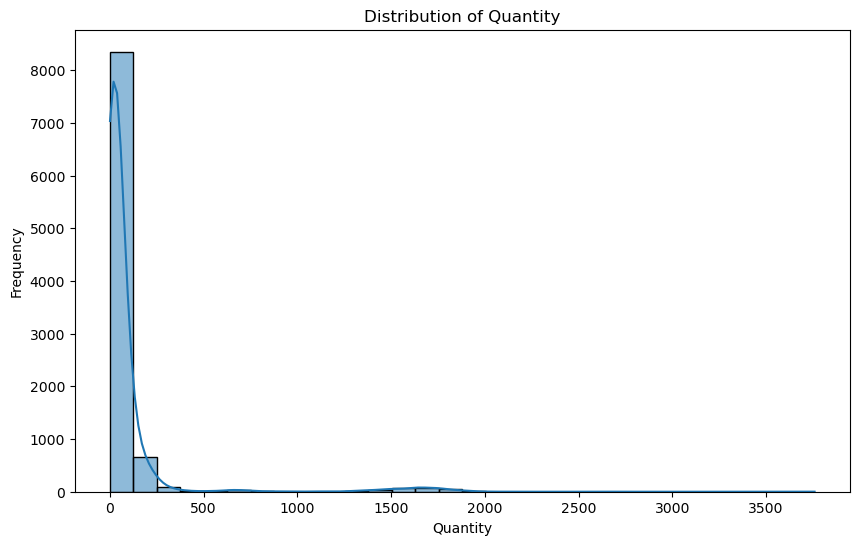

In [141]:
# Plot distribution of 'quantity'
plt.figure(figsize=(10, 6))
sns.histplot(data['quantity'], bins=30, kde=True)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

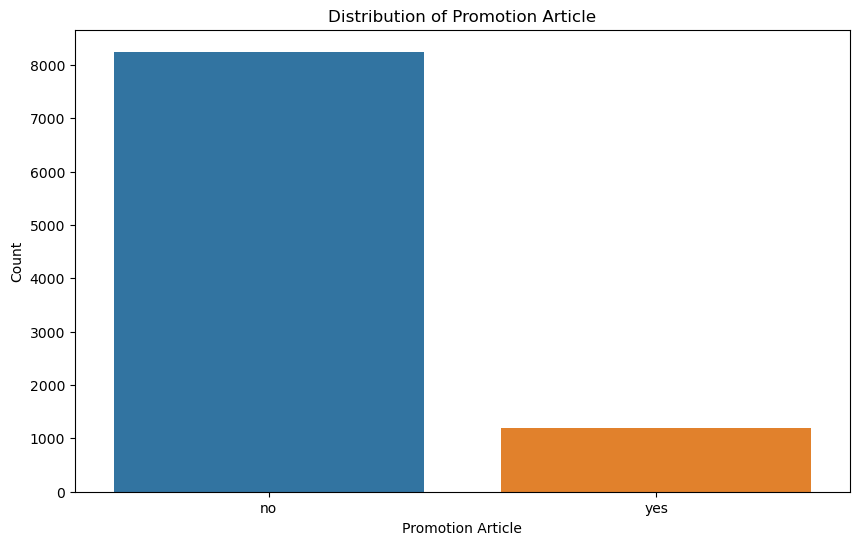

In [142]:
# Plot distribution of 'promotion_article'
plt.figure(figsize=(10, 6))
sns.countplot(data['promotion_article'])
plt.title('Distribution of Promotion Article')
plt.xlabel('Promotion Article')
plt.ylabel('Count')
plt.show()

#### Correlation Analysis

In [144]:
# Compute the correlation matrix
correlation_matrix = data.corr()

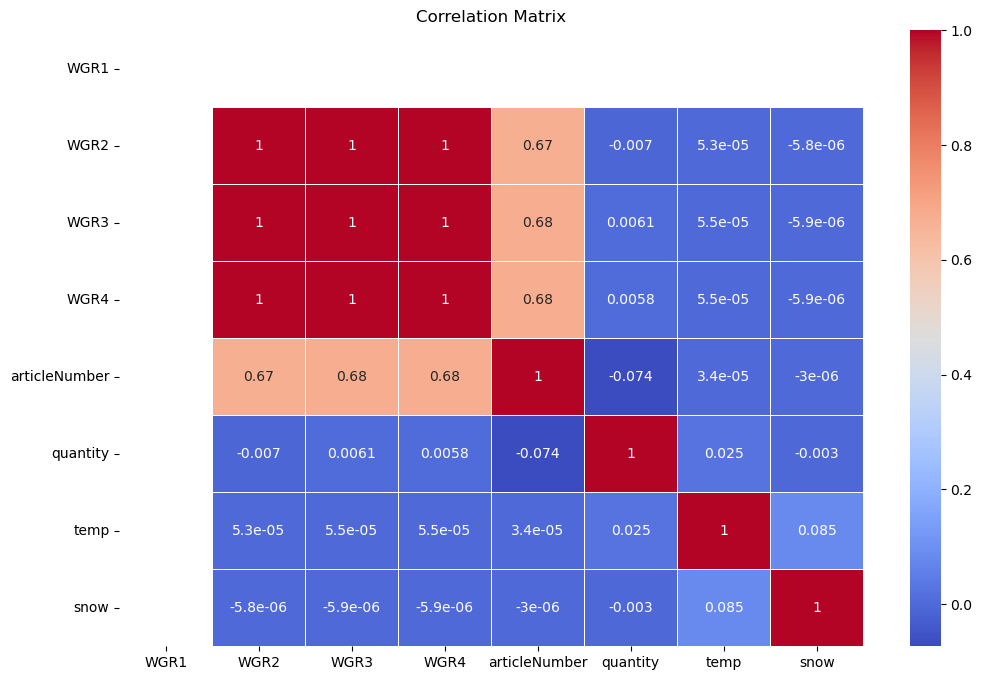

In [145]:
# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#### Trend Analysis

In [150]:
import _datetime

In [155]:
# Filter out dates beyond the current year
current_year = datetime.datetime.now().year
data = data[data.index.year <= current_year]

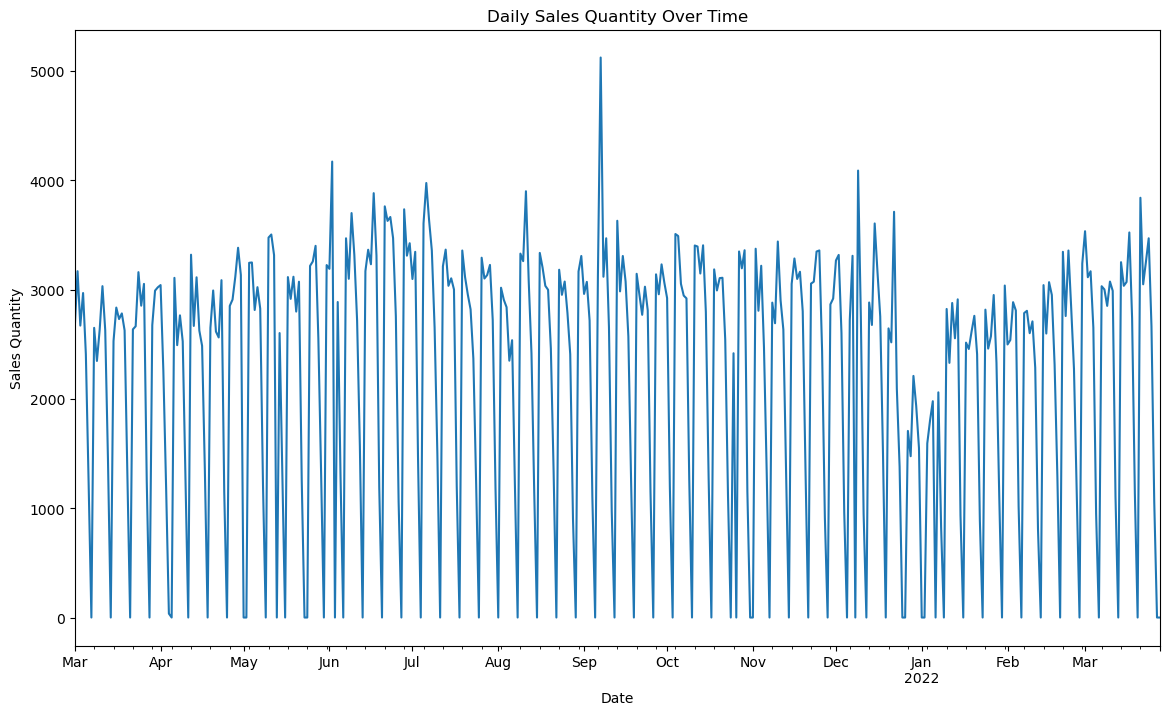

In [156]:
# Plot sales quantity over time
plt.figure(figsize=(14, 8))
data['quantity'].resample('D').sum().plot()
plt.title('Daily Sales Quantity Over Time')
plt.xlabel('Date')
plt.ylabel('Sales Quantity')
plt.show()

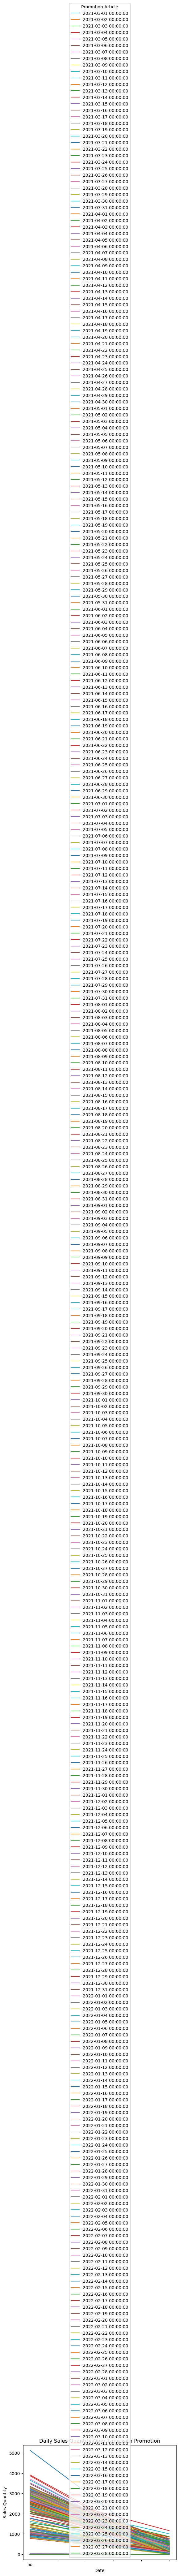

In [157]:
# Plot sales quantity over time with promotion
#plt.figure(figsize=(4, 8))
data.groupby('promotion_article')['quantity'].resample('D').sum().unstack().plot()
plt.title('Daily Sales Quantity Over Time with Promotion')
plt.xlabel('Date')
plt.ylabel('Sales Quantity')
plt.legend(title='Promotion Article')
plt.show()


ValueError: cannot reindex on an axis with duplicate labels

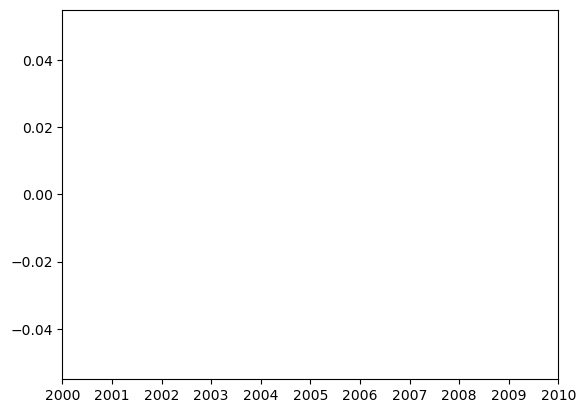

In [159]:
#Plotting graph between year and Total sales
sns.lineplot(x = "orderDate" , y = "quantity",data= data )
plt.show()

#### Checking for Stationary

In [161]:
from statsmodels.tsa.stattools  import adfuller
#Checking Dataset is stationary or not
results = adfuller(data['quantity'])
print(results)


(-13.234819134610996, 9.425126109030214e-25, 38, 9372, {'1%': -3.4310479398190523, '5%': -2.8618484456068174, '10%': -2.566934180508171}, 131411.91654222837)


In [162]:
#We can also print p-value,Test statistics and Critical values as follows
results = adfuller(data['quantity'])
print('Test Statistics: %f' % results[0])
print('p-value: %f' % results[1])
print('Critical Values: ')
for key, value in results[4].items():
    print('\t%s: %.3f' % (key,value))

Test Statistics: -13.234819
p-value: 0.000000
Critical Values: 
	1%: -3.431
	5%: -2.862
	10%: -2.567
